<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-3----brightness-temperatures" data-toc-modified-id="Assignment-3----brightness-temperatures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 3 -- brightness temperatures</a></span></li><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 1</a></span></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 2</a></span></li></ul></div>

# Assignment 3 -- brightness temperatures

Upload this notebook to canvas by 10am Monday Sept. 24

# Problem 1

In the cell below define a function that inverts the radiance (in MKS units) for the
brightness temperature in Kelvins.  Use the same format as the planck_function notebook,
and use the %%file magic to output your function to a file called planck_invert.py

i.e. the top of the cell should look like:

```python
%%file planck_invert.py
def radiance_invert(wavelengths, Temp):
   etc.
```

In [1]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%%file plank_invert.py
import numpy as np
c1 =3.74 * (10**-16)
c2 =0.0144    #MKS UNIT 

def radiance_invert(wavel, Lstar):
    temperature = c2 / (wavel * np.log((c1 /(np.pi * Lstar *(wavel**5)))+1))
    return temperature

Overwriting plank_invert.py


# Problem 2

In the next cell import your radiance_invert function and use it to turn the calibrated
radiances you've written out in your modis_data_analysis notebook into brightness temperatures
in Kelvins.  Plot the temperatures as an image, using a colorbar as in Modis level1b notebook

In [3]:
home = Path.home()
print(home)
data_dir = home / Path("Desktop/ubc/a301")
print(data_dir)

C:\Users\mu448
C:\Users\mu448\Desktop\ubc\a301


In [4]:
hdf_files=list(data_dir.glob("ch30_out*.hdf"))
hdf_files

[WindowsPath('C:/Users/mu448/Desktop/ubc/a301/ch30_out.hdf')]

In [5]:
file_name = str(data_dir / Path(hdf_files[0]))
print(f'reading {file_name}')
the_file = SD(file_name, SDC.READ)
stars='*'*50
print((f'\n{stars}\nnumber of datasets, number of attributes'
       f'={the_file.info()}\n{stars}\n'))

reading C:\Users\mu448\Desktop\ubc\a301\ch30_out.hdf

**************************************************
number of datasets, number of attributes=(1, 0)
**************************************************



In [6]:
datasets_dict = the_file.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

0 ch30


In [7]:
longwave_data = the_file.select('ch30')
print(longwave_data.info())

('ch30', 2, [2030, 1354], 6, 2)


In [8]:
print(longwave_data.get())

[[2.07617736 2.07942794 2.07577103 ... 2.65112502 2.66209575 2.65437561]
 [2.0578928  2.04285883 2.0318881  ... 2.61455591 2.61821282 2.61455591]
 [2.02904384 2.01035296 2.01400987 ... 2.62024444 2.62390135 2.61983812]
 ...
 [1.82669477 1.82669477 1.82344418 ... 2.5727046  2.58001842 2.6161812 ]
 [1.81775565 1.82466315 1.82466315 ... 2.57717416 2.57311092 2.61171165]
 [1.83807182 1.83482123 1.83482123 ... 2.55929592 2.56660975 2.59098915]]


In [9]:
rad_data = longwave_data[:,:]

reading function from C:\Users\mu448\a301\a301_code\assignments\plank_invert.py


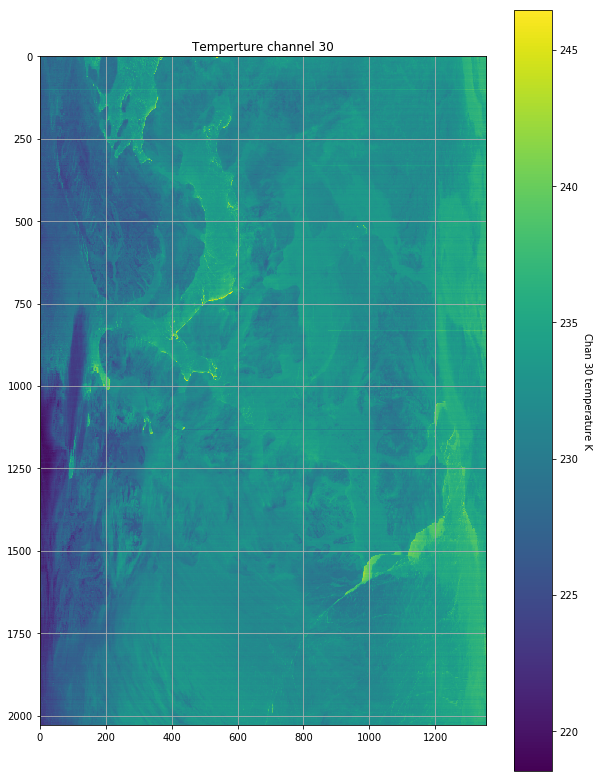

In [10]:
import plank_invert
from plank_invert import radiance_invert
print(f'reading function from {plank_invert.__file__}')

Lstar = rad_data *(10**6)   #MKS unit 
wavel= 9.73*(10**-6)
Temperature=radiance_invert(wavel, Lstar)
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(Temperature)
cax=fig.colorbar(CS)
ax.grid(True)
ax.set(title=f"Temperture channel 30");
out=cax.ax.set_ylabel('Chan 30 temperature K')
out.set_verticalalignment('bottom')
out.set_rotation(270)